Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


Clone & Explore dataset

In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 27.64 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os

main_dir = "/content/datasets/Data"

train_dir = os.path.join(main_dir,"train")

test_dir = os.path.join(main_dir,"test")


train_covid_dir = os.path.join(train_dir,"COVID19")

train_normal_dir = os.path.join(train_dir,"NORMAL")

test_covid_dir = os.path.join(test_dir,"COVID19")

test_normal_dir = os.path.join(test_dir,"NORMAL")


In [4]:

train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(27).jpg', 'COVID19(32).jpg', 'COVID19(536).jpg', 'COVID19(397).jpg', 'COVID19(424).jpg', 'COVID19(134).jpg', 'COVID19(348).jpg', 'COVID19(133).jpg', 'COVID19(19).jpg', 'COVID-19 (342).jpg']
['NORMAL(1142).jpg', 'NORMAL(549).jpg', 'NORMAL(1140).jpg', 'NORMAL(688).jpg', 'NORMAL(640).jpg', 'NORMAL(32).jpg', 'NORMAL(902).jpg', 'NORMAL(573).jpg', 'NORMAL(596).jpg', 'NORMAL(366).jpg']
['COVID19(218).jpg', 'COVID19(124).jpg', 'COVID19(512).jpg', 'COVID19(36).jpg', 'COVID19(186).jpg', 'COVID-19 (540).jpg', 'COVID-19 (863).jpg', 'COVID19(70).jpg', 'COVID-19 (457).jpg', 'COVID19(521).jpg']
['NORMAL(199).jpg', 'NORMAL(1175).jpg', 'NORMAL(1359).jpg', 'NORMAL(1431).jpg', 'NORMAL(1333).jpg', 'NORMAL(1520).jpg', 'NORMAL(471).jpg', 'NORMAL(9).jpg', 'NORMAL(455).jpg', 'NORMAL(1327).jpg']


In [5]:
print("Tottal images present in the training set :", len(train_covid_names)+len(train_normal_names))

print("Tottal images present in the testing set :", len(test_covid_names)+len(test_normal_names))

Tottal images present in the training set : 1811
Tottal images present in the testing set : 484


Data Visualization


['/content/datasets/Data/train/COVID19/COVID19(27).jpg', '/content/datasets/Data/train/COVID19/COVID19(32).jpg', '/content/datasets/Data/train/COVID19/COVID19(536).jpg', '/content/datasets/Data/train/COVID19/COVID19(397).jpg', '/content/datasets/Data/train/COVID19/COVID19(424).jpg', '/content/datasets/Data/train/COVID19/COVID19(134).jpg', '/content/datasets/Data/train/COVID19/COVID19(348).jpg', '/content/datasets/Data/train/COVID19/COVID19(133).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1142).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(549).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1140).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(688).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(640).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(32).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(902).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(573).jpg']


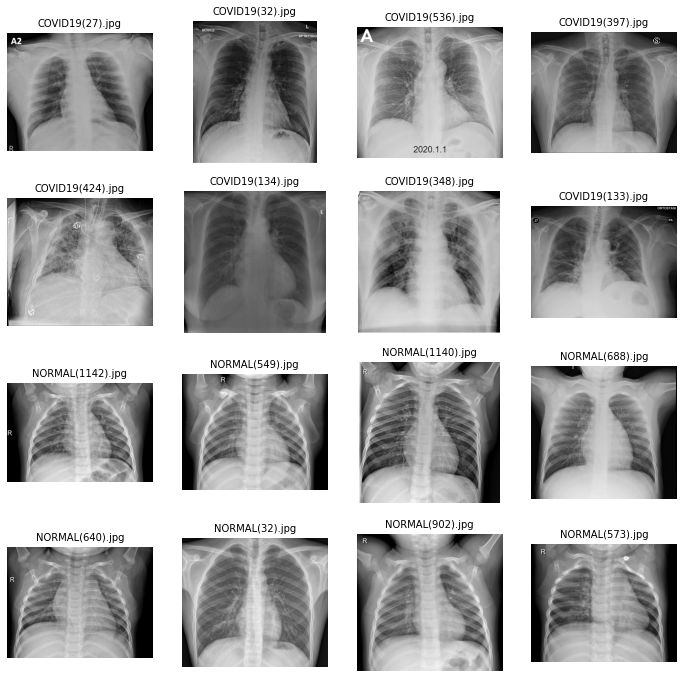

In [6]:
import matplotlib.image as mpimg

rows = 4
cols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]

print(covid_pic)
print(normal_pic)


merged_list = covid_pic+normal_pic
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap='gray')

plt.show()

Data Preprocessing & Augmentation

In [7]:
dgen_train = ImageDataGenerator(rescale= 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale= 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

Build Convolutional Neural Network Model

In [10]:
model = Sequential()

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape = (150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

Compile & Train the Model

In [11]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 56s 1s/step - loss: 0.7025 - accuracy: 0.7688 - val_loss: 0.4189 - val_accuracy: 0.9144
Epoch 2/30
46/46 [==============================] - 46s 1s/step - loss: 0.2247 - accuracy: 0.9117 - val_loss: 0.1774 - val_accuracy: 0.9448
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.1501 - accuracy: 0.9434 - val_loss: 0.1468 - val_accuracy: 0.9392
Epoch 4/30
46/46 [==============================] - 47s 1s/step - loss: 0.1442 - accuracy: 0.9496 - val_loss: 0.2509 - val_accuracy: 0.9116
Epoch 5/30
46/46 [==============================] - 47s 1s/step - loss: 0.1747 - accuracy: 0.9393 - val_loss: 0.1538 - val_accuracy: 0.9392
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1414 - accuracy: 0.9489 - val_loss: 0.2240 - val_accuracy: 0.9199
Epoch 7/30
46/46 [==============================] - 46s 1s/step - loss: 0.1207 - accuracy: 0.9600 - val_loss: 0.1566 - val_accuracy: 0.9475
Epoch 8/30
46/46 [==

Performance Evaluation

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

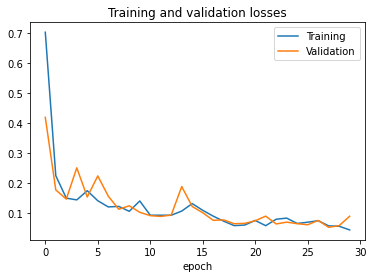

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

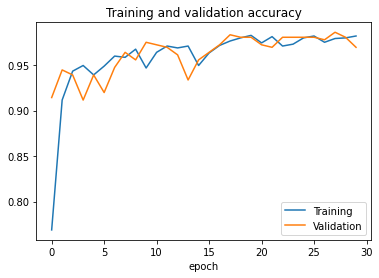

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(test_loss)
print(test_acc)

16/16 [==============================] - 10s 627ms/step - loss: 0.1451 - accuracy: 0.9463
0.1451318860054016
0.9462810158729553
